In [1]:
!pip install cdsapi

  Created wheel for cdsapi: filename=cdsapi-0.2.7-py2.py3-none-any.whl size=11487 sha256=e3d5a930b9c739e747bc74c207b122ed80b18d34ead30b3f059ea8b30080efab
  Stored in directory: /root/.cache/pip/wheels/45/dd/13/b6a05d1b30236d50ffcba30bd238fd1db37f6b89cd9ef35951
Successfully built cdsapi


In [0]:
!cp /content/drive/My\ Drive/ATMS597\ Weather\ Climate\ Data\ Analysis/Module\ 6/Project\ 6/.cdsapirc /root/  # copy configuration file to /root

In [3]:
# download 1980-2019 daily (12UTC) soil moisture in soil layer 1 (0-7cm) near the selected station
import cdsapi
c = cdsapi.Client()
c.retrieve(
    'reanalysis-era5-single-levels',
    {
        'product_type': 'reanalysis',
        'format': 'netcdf',
        'variable': 'volumetric_soil_water_layer_1',
        'date': '1980-01-01/2019-12-31',
        'time': '12:00',
        'area': '-38.5/-62.25/-38.75/-62',   
    },
    '/content/drive/My Drive/ATMS597 Weather Climate Data Analysis/Module 6/Project 6/ERA5_swvl1.nc')

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
2020-05-03 15:21:37,443 INFO Welcome to the CDS
2020-05-03 15:21:37,444 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
2020-05-03 15:21:39,741 INFO Request is completed
2020-05-03 15:21:39,742 INFO Downloading http://136.156.132.236/cache-compute-0007/cache/data0/adaptor.mars.internal-1588471826.7904537-23063-5-b20d98b7-fc5e-4b91-8e69-8515cf2f4248.nc to /c

Result(content_length=176424,content_type=application/x-netcdf,location=http://136.156.132.236/cache-compute-0007/cache/data0/adaptor.mars.internal-1588471826.7904537-23063-5-b20d98b7-fc5e-4b91-8e69-8515cf2f4248.nc)

In [4]:
# download 1980-2019 daily (12UTC) soil moisture in soil layer 2 (7-28cm) near the selected station
import cdsapi
c = cdsapi.Client()
c.retrieve(
    'reanalysis-era5-single-levels',
    {
        'product_type': 'reanalysis',
        'format': 'netcdf',
        'variable': 'volumetric_soil_water_layer_2',
        'date': '1980-01-01/2019-12-31',
        'time': '12:00',
        'area': '-38.5/-62.25/-38.75/-62',   
    },
    '/content/drive/My Drive/ATMS597 Weather Climate Data Analysis/Module 6/Project 6/ERA5_swvl2.nc')

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
2020-05-03 15:24:01,184 INFO Welcome to the CDS
2020-05-03 15:24:01,185 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
2020-05-03 15:24:02,261 INFO Request is queued
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: 

Result(content_length=176428,content_type=application/x-netcdf,location=http://136.156.132.110/cache-compute-0001/cache/data9/adaptor.mars.internal-1588519442.4638035-16275-25-71b43a4c-2eca-4921-ae59-b7b574ada1b9.nc)

In [5]:
%pylab inline
import xarray as xr
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [6]:
# load the data
swvl1 = xr.open_dataset('/content/drive/My Drive/ATMS597 Weather Climate Data Analysis/Module 6/Project 6/ERA5_swvl1.nc')
swvl1

<xarray.Dataset>
Dimensions:    (latitude: 2, longitude: 2, time: 14610)
Coordinates:
  * longitude  (longitude) float32 -62.25 -62.0
  * latitude   (latitude) float32 -38.5 -38.75
  * time       (time) datetime64[ns] 1980-01-01T12:00:00 ... 2019-12-31T12:00:00
Data variables:
    swvl1      (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-05-03 02:32:43 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [7]:
# load the data
swvl2 = xr.open_dataset('/content/drive/My Drive/ATMS597 Weather Climate Data Analysis/Module 6/Project 6/ERA5_swvl2.nc')
swvl2

<xarray.Dataset>
Dimensions:    (latitude: 2, longitude: 2, time: 14610)
Coordinates:
  * longitude  (longitude) float32 -62.25 -62.0
  * latitude   (latitude) float32 -38.5 -38.75
  * time       (time) datetime64[ns] 1980-01-01T12:00:00 ... 2019-12-31T12:00:00
Data variables:
    swvl2      (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-05-03 15:50:32 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [0]:
# calculate the time series
swvl1_aave = np.mean(swvl1['swvl1'], axis=(1, 2))
swvl2_aave = np.mean(swvl2['swvl2'], axis=(1, 2))

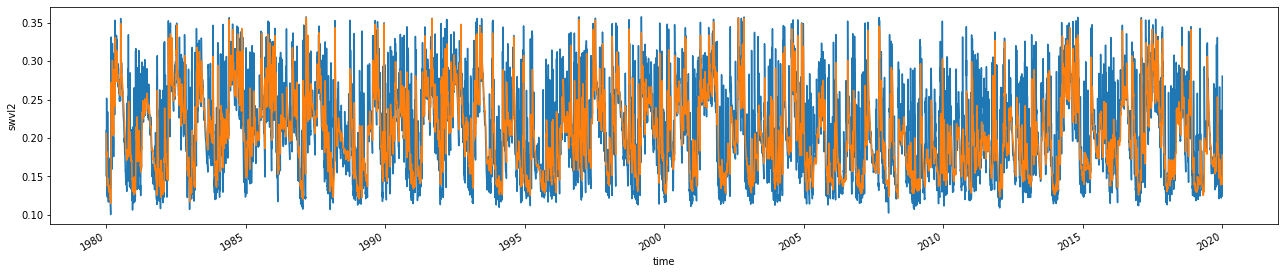

In [11]:
# plot the time series
fig = plt.figure(figsize=(22,4))
swvl1_aave.plot()
swvl2_aave.plot()

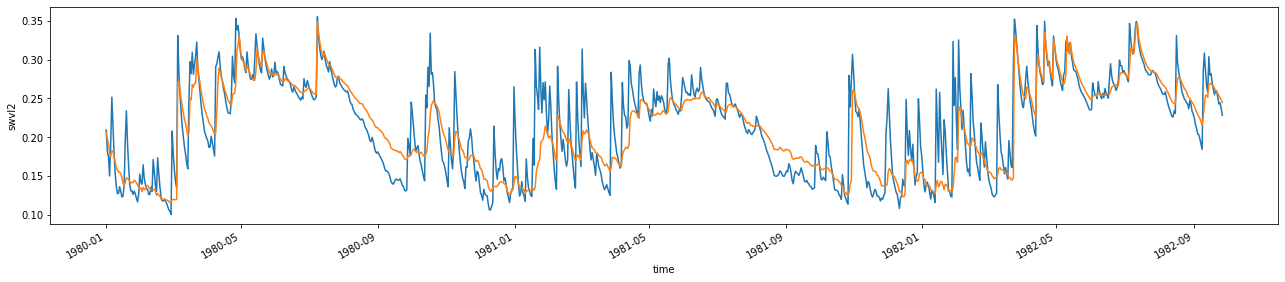

In [14]:
fig = plt.figure(figsize=(22,4))
swvl1_aave[0:1000].plot()
swvl2_aave[0:1000].plot()